### MyNerualNetwork Class

From zero my implementation of feedforward nerual network with basic backpropagation algorithm.

In [147]:
import numpy as np
from math import sqrt

# Helper functions
def sigmoid(x):
    x = np.clip(x, -500, 500) # not to run into overflow error
    return 1 / (1 + np.exp(-x))

def sigmoid_derived(x):
    x = np.clip(x, -100, 100) # not to run into overflow error
    return np.exp(x)/(1 + np.exp(x))**2

def relu(x):
    return x * (x > 0)

def relu_derived(x):
    return 1. * (x > 0)

def leaky_relu(x):
    return x * (x > 0) + 0.01 * x * (x < 0)

def leaky_relu_derived(x):
    return 1.0 * (x > 0) + 0.01 * (x < 0)

class MyNeuralNetwork():
    '''
    Activation function in hidden layers is sigmoid. 
    Output layer is linear for now (regression problems only).
    '''
    
    def __init__(self, architecture, activation, activation_derived):

        print("Initializing network with architecture:", architecture, " Activation: ", activation.__name__)
        
        self.architecture = architecture  # Array describing network structure, first is input, last is output all others are hidden
        self.input_size = architecture[0] # Input features size
        self.layers = len(architecture)   # Number of Layers
        
        self.W = [] # list of weight matrices
        self.initialize_W()
        
        self.activation = activation
        self.activation_derived = activation_derived
        
    def initialize_W(self):
        '''
        Initializes weights from N(0, 1/sqrt(input_features_size))
        '''
        for i in range(self.layers - 1):
            tmp_W = np.random.normal(loc = 0, scale = 1/sqrt(self.input_size), size = self.architecture[i:i+2])
            self.W.append(tmp_W)
    
    def feedforward_one_step(self, x, layer):
        y = np.dot(x, self.W[layer])
        if layer == self.layers - 2:  # Do not apply activation function in output layer calculations
            return y
        else:                         # Apply activation function
            return self.activation(y)
    
    def feedforward(self, x):
        '''For a given input vector column calculate output'''
        for layer in range(self.layers - 1):
            x = self.feedforward_one_step(x, layer)
        return x
    
    def feedforward_full(self, x):
        '''For a given input vector column feature vector for each layer'''
        list_x = []
        x.shape = (1, x.size)
        list_x.append(x)
        
        for layer in range(self.layers - 1):
            x = self.feedforward_one_step(x, layer)
            x.shape = (1, x.size)
            list_x.append(x)

        return list_x
    
    def backpropagation(self, x, y, alpha = 0.01, print_ = False):
        list_x = self.feedforward_full(x) # Ima indekse 0, 1, 2, 3
        gradients = []
        delta = 1
        for layer in range(self.layers - 2, -1, -1):  ## ide 2, 1, 0
            new_gradient = np.dot(delta, list_x[layer])
            new_gradient = np.transpose(new_gradient)
            gradients.append(new_gradient)
            
            if(layer > 0):
                psi = np.dot(list_x[layer-1], self.W[layer-1])
                sigm_d = np.eye(psi.size) * self.activation_derived(psi)
                delta = np.dot(np.dot(sigm_d, self.W[layer]), delta)
        gradients.reverse()
        
        error = list_x[-1] - y
        # We have gradients, now we just apply them
        for i, W in enumerate(self.W):
            
            if print_:
                print("Current Weights: \n", self.W[i], 
                      "\nNet Estimate", list_x[-1],
                      "\nError: \n", error,
                     "\nGradient: \n", gradients[i],
                     "\n Update: \n", - alpha * error * gradients[i])

            self.W[i] = self.W[i] - alpha * error * gradients[i]
        return

Checking if both types of network work

In [142]:
import matplotlib.pyplot as plt

In [227]:
net_sigmoid = MyNeuralNetwork([11, 3, 1], sigmoid, sigmoid_derived)
net_relu = MyNeuralNetwork([11, 3, 1], relu, relu_derived)
net_leaky_relu = MyNeuralNetwork([11, 3, 1], leaky_relu, leaky_relu_derived)

Initializing network with architecture: [11, 3, 1]  Activation:  sigmoid
Initializing network with architecture: [11, 3, 1]  Activation:  relu
Initializing network with architecture: [11, 3, 1]  Activation:  leaky_relu


In [244]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.linspace(-1, 1, num = 11)

def state_to_vector(s):
    x = np.zeros(11)
    x[s] = 1
    return x

In [248]:
for i in range(100):
    index = np.random.randint(0, 11)
    net_sigmoid.backpropagation(state_to_vector(x[index]), y[index], alpha = 1)
    net_relu.backpropagation(state_to_vector(x[index]), y[index], alpha = 1, print_ = False)
    net_leaky_relu.backpropagation(state_to_vector(x[index]), y[index], alpha = 1, print_ = False)

In [249]:
v_sigmoid = np.zeros(11)
v_relu = np.zeros(11)
v_leaky_relu = np.zeros(11)
for i in range(len(x)):
    v_sigmoid[i] = net_sigmoid.feedforward(state_to_vector(i))
    v_relu[i] = net_relu.feedforward(state_to_vector(i))
    v_leaky_relu[i] = net_leaky_relu.feedforward(state_to_vector(i))

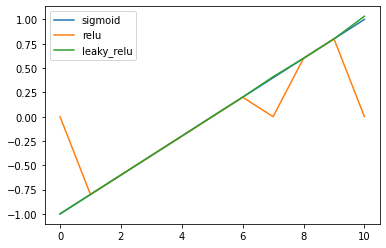

In [250]:
plt.plot(x, v_sigmoid, label = "sigmoid")
plt.plot(x, v_relu, label = "relu")
plt.plot(x, v_leaky_relu, label = "leaky_relu")
plt.legend()